**LAB 1**
**Approximating natural languages**

PREPRATATION

In [1]:
import random
import matplotlib.pyplot as plt

def get_data(files):
    data = ""
    for file in files:
        text = open("/home/maciej/Information Theory/lab1/lab1_2/"+file)
        for letter in text:
                data +=letter
    data = ''.join([i for i in data if not i.isdigit()])
    return data
files = ['norm_romeo_and_juliet.txt','norm_hamlet.txt','norm_wiki_sample.txt']
file = get_data(files) 

In [2]:
class Text:
    def __init__(self,text,letters_frequency=None,order_number=0):
        self.text = text
        self.length = len(text)
        self.num_of_order = order_number
        self.words = None
        self.letters_dictionary = None
        self.average_word_length = None
        self.letters_frequency = letters_frequency
        
    def run(self):
        self.letters_dictionary = self.get_count_letters()
        self.get_words()
        self.get_average_word_len()
        self.get_letters_frequency()
        
    def get_count_letters(self):
        letters = {}
        for pointer in range(0,len(self.text), 1):
            if self.text[pointer:pointer + self.num_of_order+1] in letters :
                letters[self.text[pointer:pointer + self.num_of_order+1]] += 1
            else:
                letters[self.text[pointer:pointer + self.num_of_order+1]] = 1
        return letters

    def get_words(self):
        words = self.text.split(' ')
        self.words = words


    def get_average_word_len(self):
        lengths = []
        for word in self.words:
            lengths.append(len(word))
        self.average_word_length = (sum(lengths) / len(lengths))

    def get_letter_frequency(self,occurrences, length):
        return float(occurrences / length)


    def get_letters_frequency(self):
        frequency_dictionary = {}
        for key, value in  self.letters_dictionary.items():
            frequency_dictionary[key] =  self.get_letter_frequency(self.letters_dictionary[key], self.length)
        self.letters_frequency = frequency_dictionary
        
    def show_letters_frequency(self):
        plt.bar(range(len(self.letters_frequency)), list(self.letters_frequency.values()), align='center')
        plt.xticks(range(len(self.letters_frequency)), list(self.letters_frequency.keys()))
        plt.show()
        
    def get_n_most_frequent_letters(self,n):
        frequency = list(self.letters_dictionary.items())
        frequency.sort(key = lambda x: x[1],reverse=True)
        return frequency[:n]


Zeroth-order approximation

In [3]:
def generate_zeroth_order():
    text = ''.join(random.choices(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u',
                                'v','w','x','y','z',' '], k=1000000))
    return Text(text)

zeroth_order = generate_zeroth_order()
zeroth_order.run()
average_word_len = zeroth_order.average_word_length
print("Average word length in this approximation is:", average_word_len)

Average word length in this approximation is: 25.89620763851533


Frequency of letters

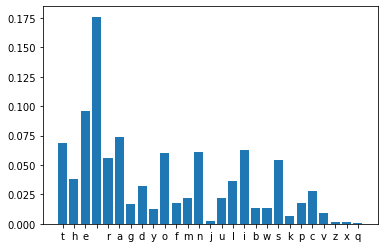

In [4]:
text = Text(file)
text.run()
text.show_letters_frequency()

Comparison between frequency graph with letters in Morse code shows that the more frequent the letter is the shorter is its Morse code length. The most probable letter to occur is "e". Second place goes to letter "a". Least probable letters are "q","z","v","j".

First-order approximation

In [5]:
def generate_first_order(file):
    text = Text(file)
    letters_frequency = text.get_count_letters()
    generated_letters = random.choices(list(letters_frequency.keys()), weights=list(letters_frequency.values()),
                                       k=text.length)
    return Text(''.join(generated_letters))

first_order = generate_first_order(file)
first_order.run()
average_word_len = first_order.average_word_length
print("Average word length in this approximation is:", average_word_len)

Average word length in this approximation is: 4.678960429040661


Conditional probability of letters

In [6]:
def prob_occuring_after_letter(file,letter,jump):
    text = Text(file)
    setattr(text, "num_of_order", jump-1)
    dic = text.get_count_letters()
    probability_dict = {}
    for key,value in dic.items():
        if letter[0][:jump-1] == key[:jump-1]:
            probability_dict[key[-1:]] = value/letter[1] 
    return  probability_dict

In [7]:
text = Text(file)
text.run()
most_frequent_letters = text.get_n_most_frequent_letters(2)

for letter in most_frequent_letters:
    print(prob_occuring_after_letter(file,letter,2))

{'t': 0.13104900844649858, 'o': 0.06087084332754007, 'r': 0.031430583879425746, 'a': 0.1125544797314063, 'j': 0.009073940710669097, 'b': 0.04608143682669163, 'w': 0.04914910733053662, 's': 0.07322318238020255, 'd': 0.03212967348248298, 'p': 0.04093704347789438, 'c': 0.05324829060211792, 'e': 0.02361679564088394, 'v': 0.009210913805465543, 'y': 0.00566225701104688, 'k': 0.0083759047468026, 'm': 0.03894882632496445, 'h': 0.038201269319133084, 'f': 0.041808403088637924, 'n': 0.021839306326102384, 'l': 0.027184944760331328, 'g': 0.01829591772763743, 'i': 0.06183386954787815, 'u': 0.012088402435381625, 'q': 0.0018096253100991844, ' ': 5.268195953709416e-07, 'z': 0.0009767235298177256, 'x': 0.0006874995719590788}
{' ': 0.3104416209208874, 'd': 0.08516099264560383, 'o': 0.005311883735095016, 't': 0.026627952883214814, 's': 0.08164644264024656, 'a': 0.04852704543238811, 'r': 0.14401643276552903, 'p': 0.011071652996827155, 'w': 0.00917972275499793, 'n': 0.08732223336573425, 'g': 0.0098698911850

Approximations based on Markov sources

In [15]:
def generate_nth_markov(file,generated_text,markov_number):
    text = Text(file)
    setattr(text, "num_of_order",markov_number-1)
    dic = text.get_count_letters()
    curr_prob = prob_occuring_after_letter(file,(generated_text[-markov_number:],\
                                                dic[generated_text[-markov_number:]]),markov_number+1)
    probability_dictionary = {generated_text[-markov_number:]:curr_prob }
    for i in range(200):
        letter= random.choices(list(curr_prob.keys()), weights=list(curr_prob.values()),
                                               k=1)[0]
        generated_text += letter
        print(letter,end='')
        if generated_text[-markov_number:] not in probability_dictionary:
            curr_prob = prob_occuring_after_letter(file,(generated_text[-markov_number:],\
                                                dic[generated_text[-markov_number:]]),markov_number+1)
            probability_dictionary[generated_text[-markov_number:]] = curr_prob
        else:
            curr_prob = probability_dictionary[generated_text[-markov_number:]]
    return generated_text


In [16]:
text_approximation1 = generate_nth_markov(file,"probability",1)

edrs baior githo d themie beegea t singes iatuia cithevinagatrquas itow medinghers orerombis woly merr sllel livexailerind as wh dist tis erioowan ang ant ar testhundmmed o s igist bag m ay astiatylis

In [17]:
text_approximation3 = generate_nth_markov(file,"probability",3)

 wellian againment join the gotation the judance of back date pareeks it curing he have il exten i and that the ear polish assic alongs  gotch raise organies sealphilore boaristings a not was  showeve

In [18]:
text_approximation5 = generate_nth_markov(file,"probability",5)

 fused on bbc home brouncke the siege or example zine scale list into two decatur times in the usa  california or went to ecuador specially by the lxii left for the late  french parrots and chorus is 

In [23]:
for idx, text in zip([1,3,5],[text_approximation1,text_approximation3,text_approximation5]):
    first_order = Text(text)
    first_order.run()
    average_word_len = first_order.average_word_length
    print(f"Average word length in {idx}th Markov approximation is:", average_word_len)

Average word length in 1th Markov approximation is: 5.424242424242424
Average word length in 3th Markov approximation is: 4.72972972972973
Average word length in 5th Markov approximation is: 4.170731707317073
